## Sim Demo

### Imports

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from env.imports import *

In [12]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

importlib.reload(sim.sim)
importlib.reload(sim.sim_run)
importlib.reload(models.train_val)
importlib.reload(data.data_utils)


<module 'data.data_utils' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/data/data_utils.py'>

#### Check job specs

In [13]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 11.5%
RAM Usage: 10.2%
Available RAM: 1.3T
Total RAM: 1.5T
52.4G


In [14]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


0
Available GPUs: 1
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.08 GB


In [15]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  9% |


In [16]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

## Simulation tests <a id="sims"></a>

### Model Parameter Counts

#### **Linear Models**
- **PCA Bilinear:** 730  _(27 PCs)_
- **PLS Bilinear:** 101  _(10 PLS components)_
- **Bilinear Low-rank:** 73,800  _(rank 10)_
- **PLS MLP:** 158,993  _(10 PLS components, including PLS projection matrices)_
- **PCA MLP:** 47,873  _(27 PCs, 2-layer)_

---

#### **MLP and SMT Models**

#### 2-Layer Models
- **MLP:** 3,812,609
- **SMT:** 1,399,947
- **MLP w/ CLS:** 3,814,145
- **SMT w/ CLS:** 1,405,579

#### 3-Layer Models
- **MLP:** 7,723,777
- **SMT:** 2,162,315
- **MLP w/ CLS:** 7,726,849
- **SMT w/ CLS:** 2,173,067

---

### Coord MLP Parameter Counts
- **[32]:** 321
- **[64, 32]:** 2,753
- **[128, 64]:** 9,601
- **[256, 128]:** 35,685
- **[512, 256, 128]:** 169,729

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
Lobe coverage: 100.0% of regions
Lobe sizes: {'Temporal': 95, 'Occipital': 52, 'Parietal': 121, 'Frontal': 132, 'Subcortex': 46, 'Cerebellum': 9}
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: r72t1994
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/r72t1994
Initialized sweep with ID: r72t1994


  warnings.warn(

  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



Testing network: Frontal
Temporal
Occipital
Parietal
Subcortex
Cerebellum
BEST CONFIG {'input_dim': 14760, 'binarize': False, 'token_encoder_dim': 60, 'd_model': 128, 'encoder_output_dim': 10, 'use_alibi': True, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [512, 256, 128], 'transformer_dropout': 0.2, 'dropout_rate': 0.2, 'learning_rate': 9e-05, 'weight_decay': 0.0001, 'batch_size': 1024, 'aug_prob': 0.45, 'epochs': 100, 'num_workers': 2, 'prefetch_factor': 4}
Number of learnable parameters in SMT model: 2162315


  from IPython.core.display import HTML, display  # type: ignore



Using 2 workers and 4 prefetch factor
Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.07 GB
Best val loss so far at epoch 1: 0.0843
Best val loss so far at epoch 2: 0.0481
Best val loss so far at epoch 3: 0.0477
Best val loss so far at epoch 4: 0.0467
Epoch 5/100, Train Loss: 0.0842, Val Loss: 0.0485, Time: 9.03s
Epoch 10/100, Train Loss: 0.0504, Val Loss: 0.0510, Time: 8.55s
Best val loss so far at epoch 12: 0.0465
Best val loss so far at epoch 13: 0.0439
Best val loss so far at epoch 14: 0.0433
Epoch 15/100, Train Loss: 0.0430, Val Loss: 0.0476, Time: 8.99s
Best val loss so far at epoch 16: 0.0427
Epoch 20/100, Train Loss: 0.0381, Val Loss: 0.0453, Time: 8.32s
Best val loss so far at epoch 23: 0.0420
Best val loss so far at epoch 24: 0.0411
Epoch 25/100, Train Loss: 0.0319, Val Loss: 0.0432, Time: 7.35s
Epoch 30/100, Train Loss: 0.0333, Val Loss: 0.0460, Time: 8.67s
Epoch 35/100, Train Loss: 0.0268, Val Loss: 0.0477, Time: 7.20s

LR REDUCED: 0.000090 → 0.000027 

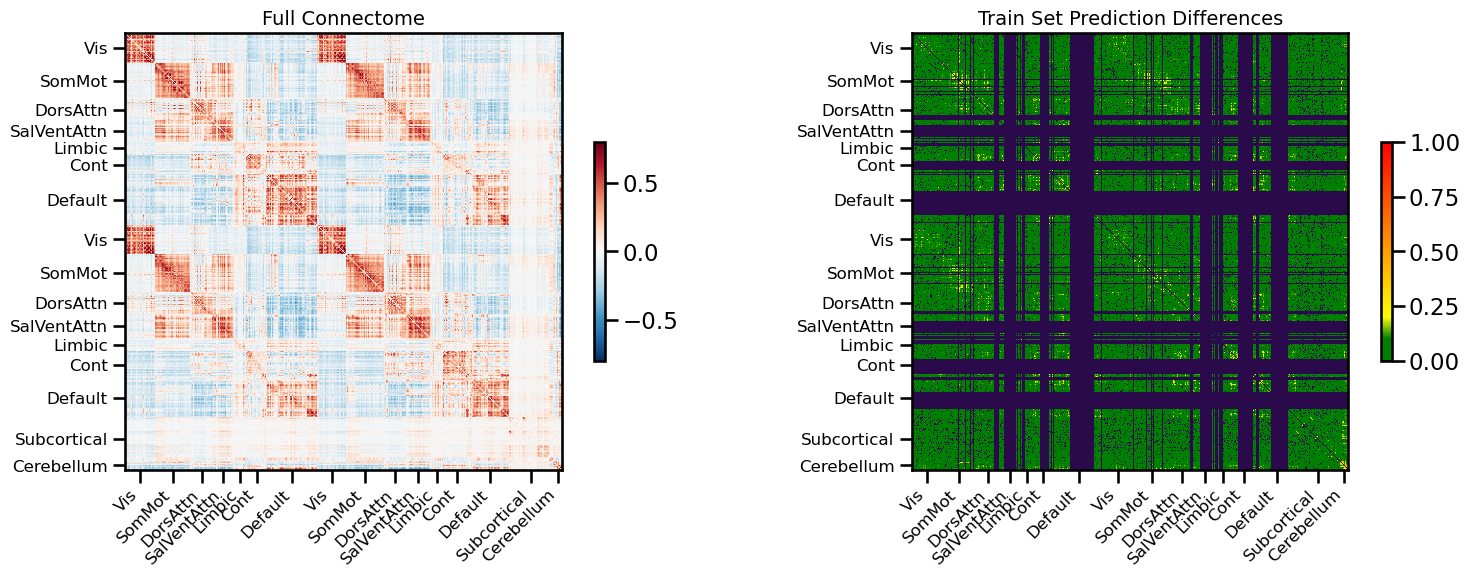

<Figure size 640x480 with 0 Axes>

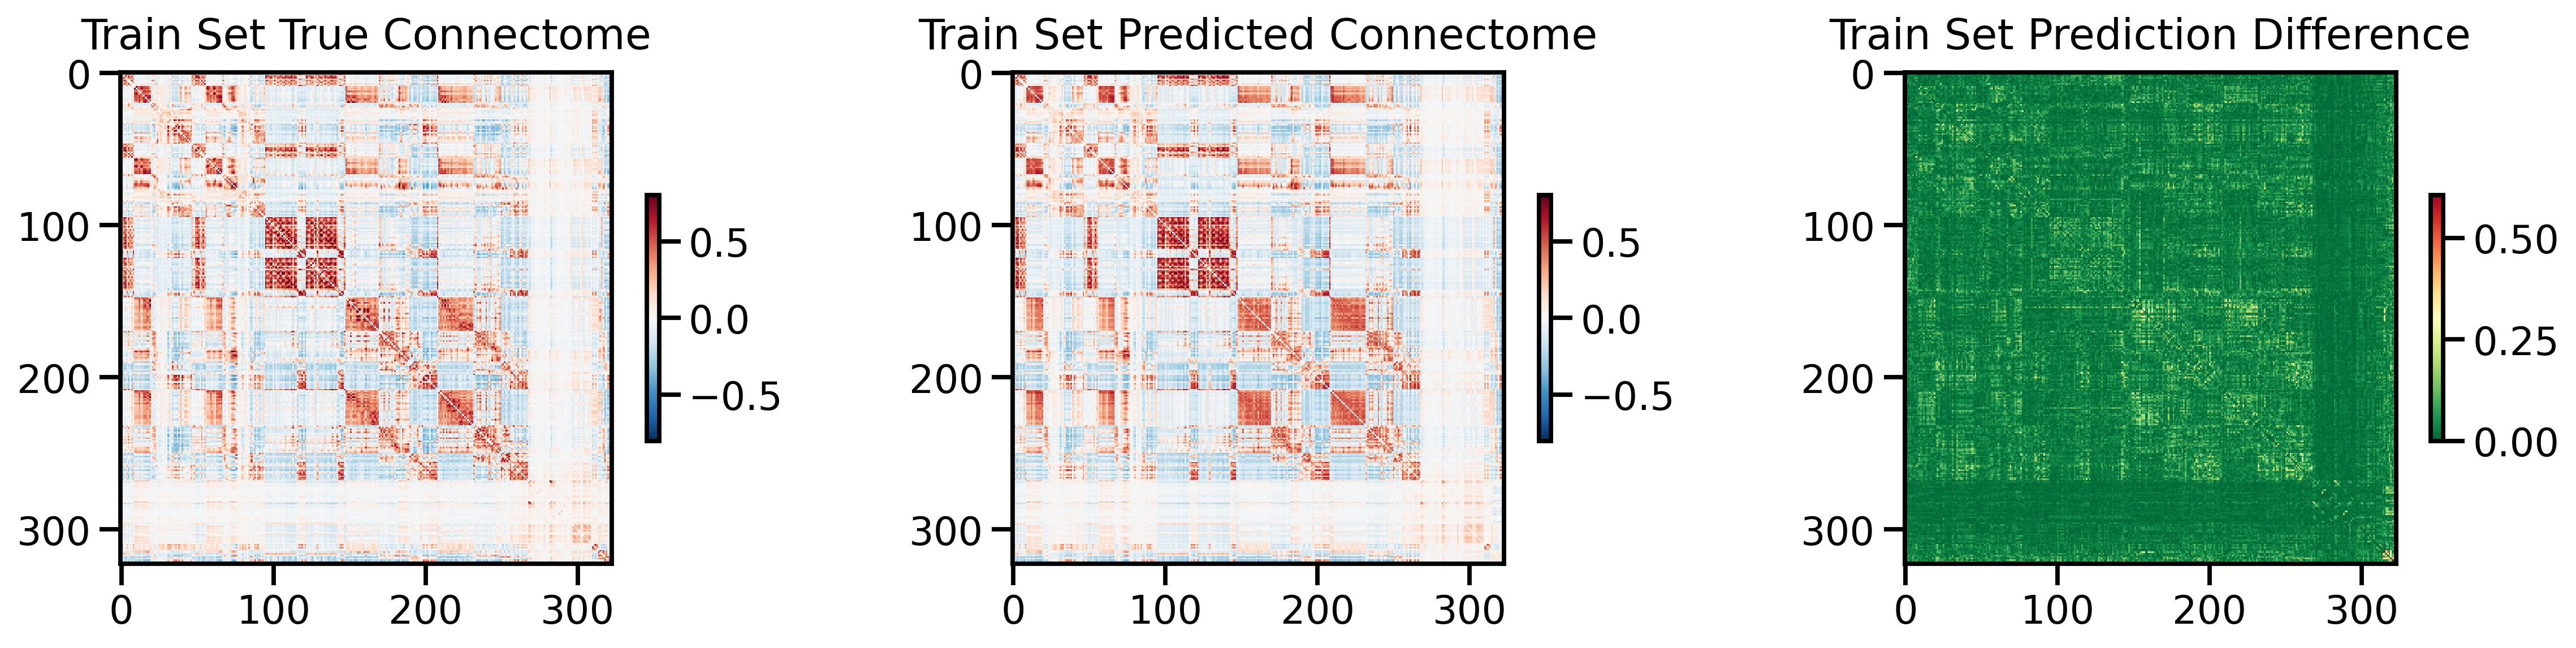

<Figure size 640x480 with 0 Axes>

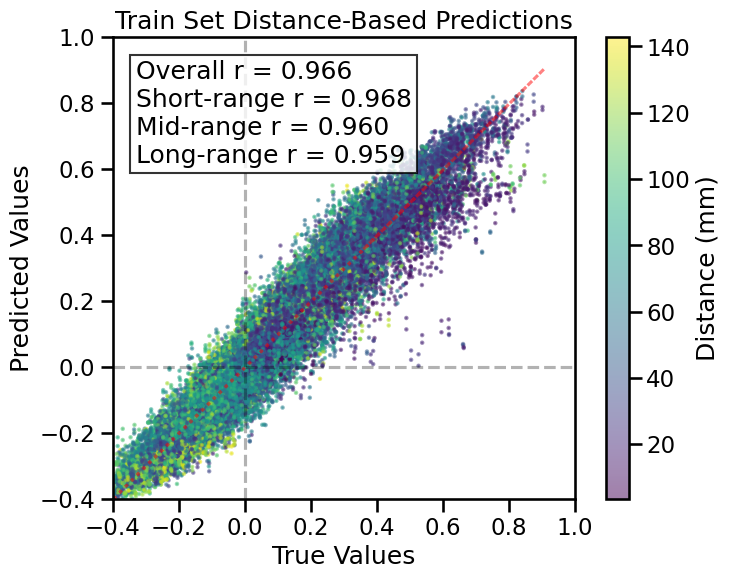

Running test evaluation...

=== TEST EVALUATION ===
Evaluating 132 regions, 17292 connections


<Figure size 640x480 with 0 Axes>

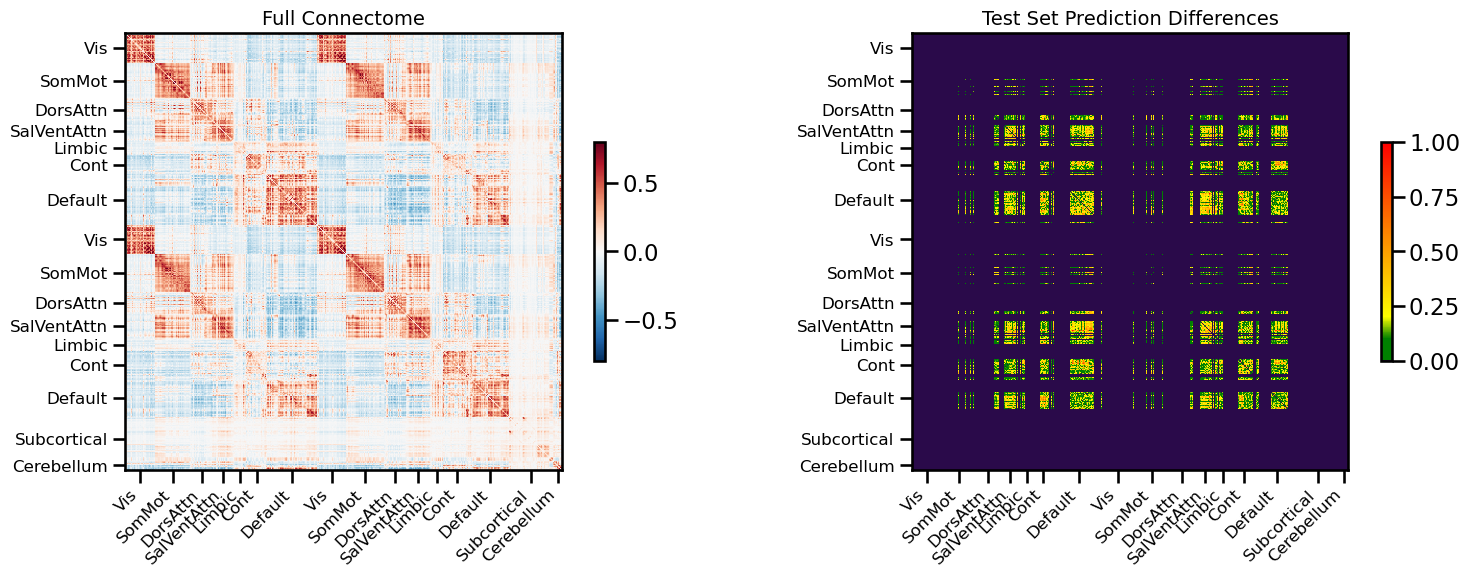

<Figure size 640x480 with 0 Axes>

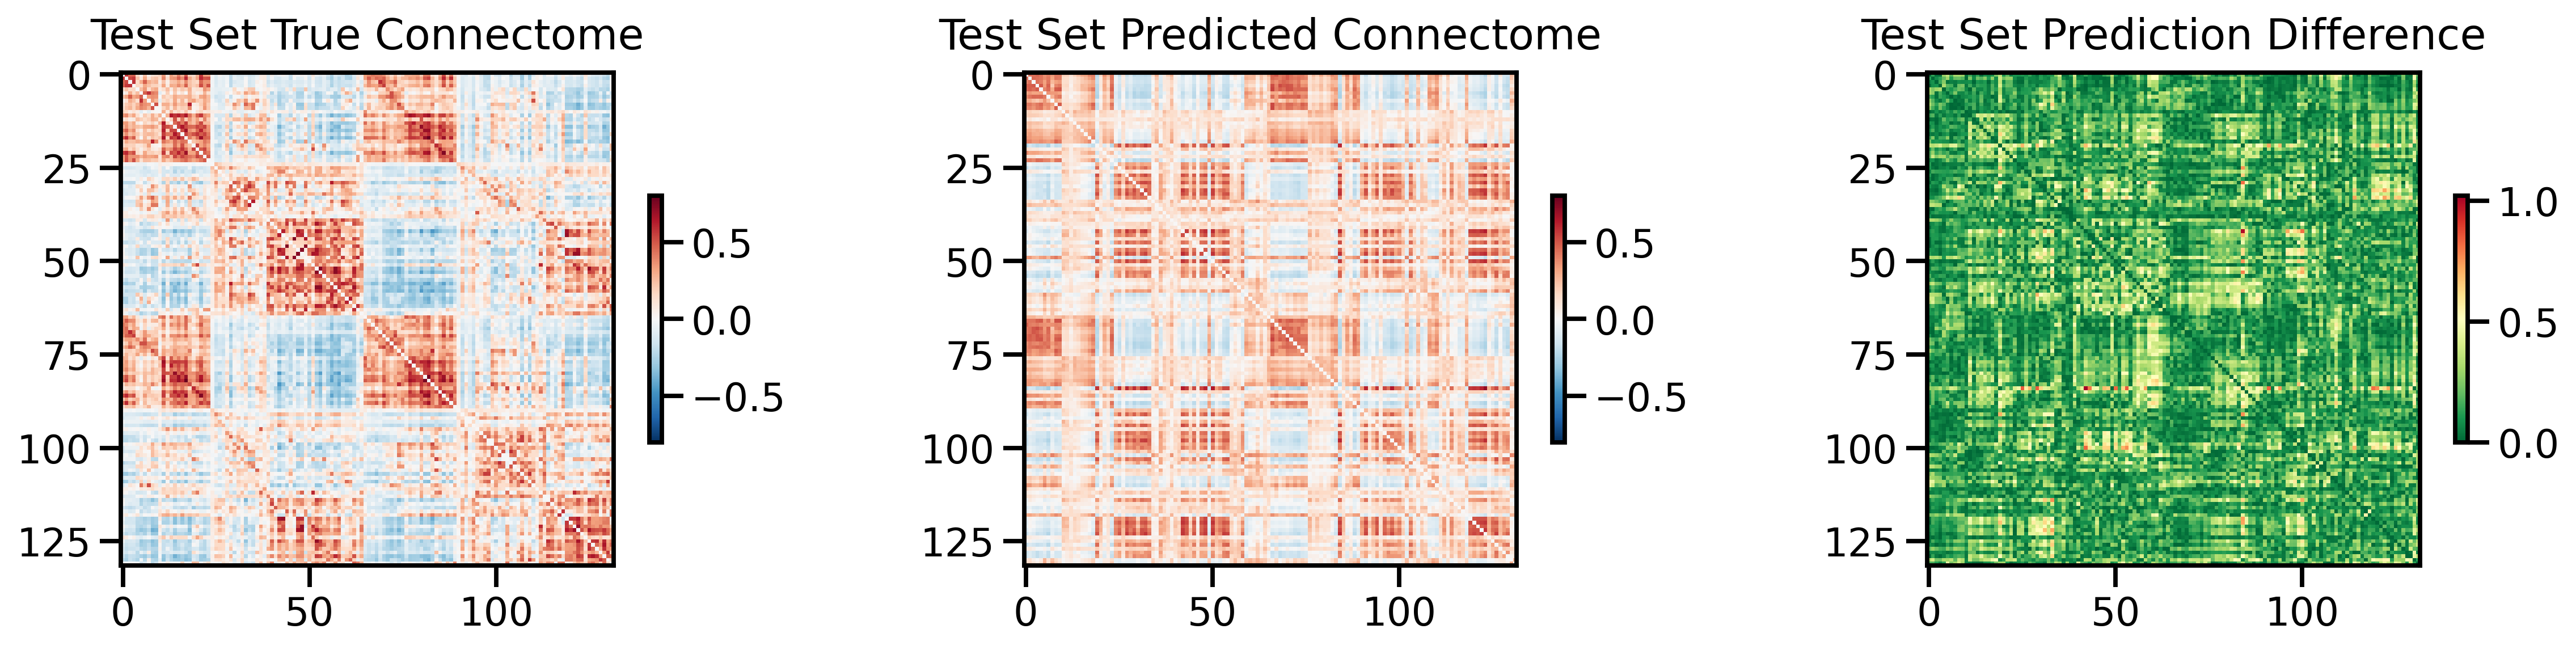

<Figure size 640x480 with 0 Axes>

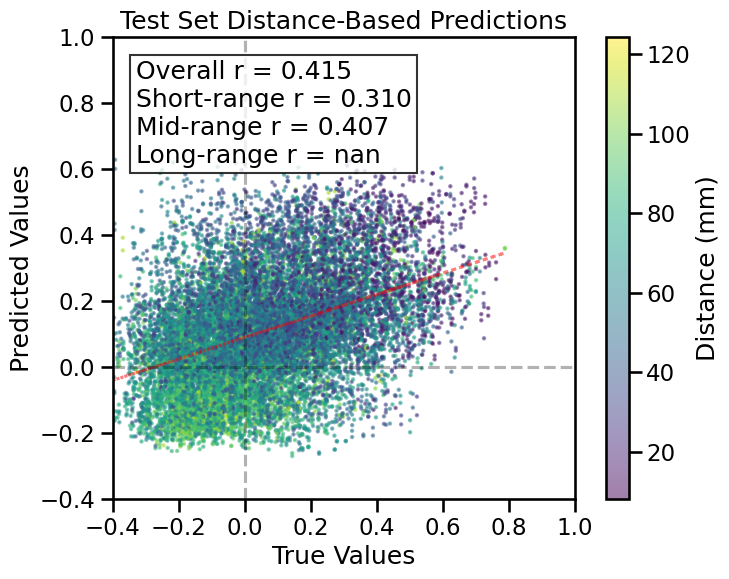

TRAIN METRICS
GLOBAL: mse=0.002484, mae=0.035517, r2=0.9275, pearson_r=0.9655, spearman_r=0.9557, geodesic_distance=17.7656
DISTANCE-BASED: short=0.9682, mid=0.9603, long=0.9590
HEMISPHERIC: left=0.9621, right=0.9690, inter=0.9681
CONNECTION STRENGTH: neg=0.4703, weak=0.9396, pos=0.7480
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  ------------------------------
  Cont          0.9379    0.9600
  Default       0.9528    0.9621
  SalVentAttn    0.9447    0.9648
  Limbic        0.9798    0.9723
  DorsAttn      0.9685    0.9623
  SomMot        0.9667    0.9641
  Vis           0.9651    0.9665
  Subcortical    0.9639    0.9621
  Cerebellum    0.9636    0.9627

TEST METRICS
GLOBAL: mse=0.047482, mae=0.171631, r2=-0.0151, pearson_r=0.4149, spearman_r=0.4194, geodesic_distance=13.8367
DISTANCE-BASED: short=0.3097, mid=0.4071
HEMISPHERIC: left=0.3966, right=0.4705, inter=0.4280
CONNECTION STRENGTH: neg=-0.0379, weak=0.3236, pos=0.1648
NETWORK CORRELATIONS:
  NETWORK      INTRA      I

  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.
CPU Usage: 24.0%
RAM Usage: 8.3%
Available RAM: 1.4T
Total RAM: 1.5T
| ID | GPU | MEM |
------------------
|  0 |  0% |  9% |
Sim complete
Simulation completed in 572.36 seconds (9.54 minutes)


8331

<Figure size 640x480 with 0 Axes>

In [17]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='UKBB',
              parcellation='S456',
              hemisphere='both',
              connectome_target='FC',
              binarize=False,
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='lobe',
              random_seed=42,
              search_method=('wandb', 'mse', 4),
              track_wandb=True,
              skip_cv=True,
              model_type='shared_transformer',
              use_gpu=True, 
              null_model='none',
              use_folds=[3]
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
Lobe coverage: 100.0% of regions
Lobe sizes: {'Temporal': 95, 'Occipital': 52, 'Parietal': 121, 'Frontal': 132, 'Subcortex': 46, 'Cerebellum': 9}
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: jdro8yyg
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/jdro8yyg
Initialized sweep with ID: jdro8yyg


  warnings.warn(

  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



Testing network: Frontal
Temporal
Occipital
Parietal
Subcortex
Cerebellum
BEST CONFIG {'input_dim': 14760, 'binarize': False, 'token_encoder_dim': 20, 'd_model': 128, 'encoder_output_dim': 10, 'use_alibi': True, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [512, 256, 128], 'cls_init': 'spatial_learned', 'transformer_dropout': 0.2, 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'weight_decay': 0.0001, 'batch_size': 1024, 'aug_prob': 0.45, 'epochs': 100, 'num_workers': 2, 'prefetch_factor': 4}
Number of learnable parameters in SMT w/ CLS model: 4686987


  from IPython.core.display import HTML, display  # type: ignore



Using 2 workers and 4 prefetch factor
Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.08 GB


W0727 18:50:01.233000 23053808019264 torch/fx/experimental/symbolic_shapes.py:4449] [0/3] ps1 is not in var_ranges, defaulting to unknown range.
W0727 18:50:01.242000 23053808019264 torch/fx/experimental/symbolic_shapes.py:4449] [0/3] ps1 is not in var_ranges, defaulting to unknown range.
W0727 18:50:31.634000 23053808019264 torch/fx/experimental/symbolic_shapes.py:4449] [0/4] ps1 is not in var_ranges, defaulting to unknown range.
W0727 18:50:31.642000 23053808019264 torch/fx/experimental/symbolic_shapes.py:4449] [0/4] ps1 is not in var_ranges, defaulting to unknown range.


Best val loss so far at epoch 1: 0.0767
Best val loss so far at epoch 2: 0.0541
Best val loss so far at epoch 3: 0.0465
Best val loss so far at epoch 5: 0.0463
Epoch 5/100, Train Loss: 0.0748, Val Loss: 0.0463, Time: 13.75s
Epoch 10/100, Train Loss: 0.0508, Val Loss: 0.0575, Time: 13.62s
Epoch 15/100, Train Loss: 0.0323, Val Loss: 0.0650, Time: 12.56s
Epoch 20/100, Train Loss: 0.0289, Val Loss: 0.0702, Time: 12.15s

LR REDUCED: 0.000100 → 0.000030 at Val Loss: 0.056402
Epoch 25/100, Train Loss: 0.0262, Val Loss: 0.0613, Time: 12.07s
Epoch 30/100, Train Loss: 0.0272, Val Loss: 0.0680, Time: 12.76s
Epoch 35/100, Train Loss: 0.0219, Val Loss: 0.0673, Time: 11.63s
Epoch 40/100, Train Loss: 0.0212, Val Loss: 0.0693, Time: 11.38s
Epoch 45/100, Train Loss: 0.0203, Val Loss: 0.0711, Time: 11.61s

LR REDUCED: 0.000030 → 0.000009 at Val Loss: 0.064770
Saved best model to models/saved_models/best_smt_cls_model_HCP_full.pt

Early stopping triggered at epoch 50. Restoring best model with Val Loss: 

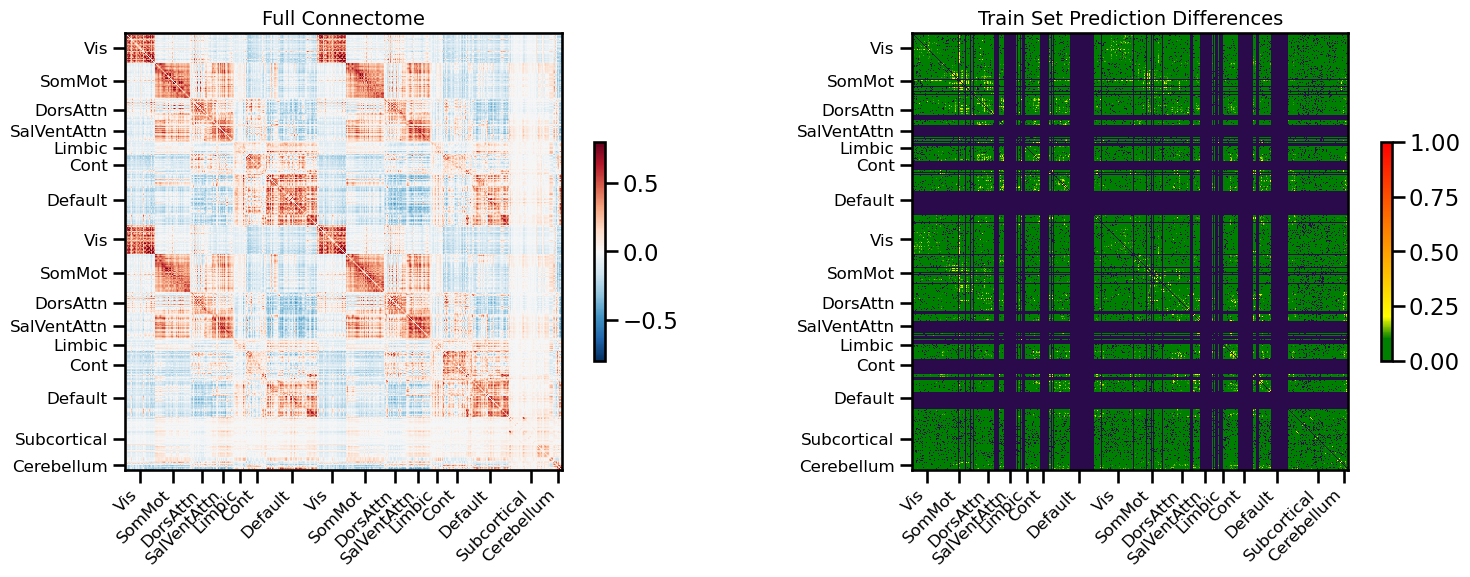

<Figure size 640x480 with 0 Axes>

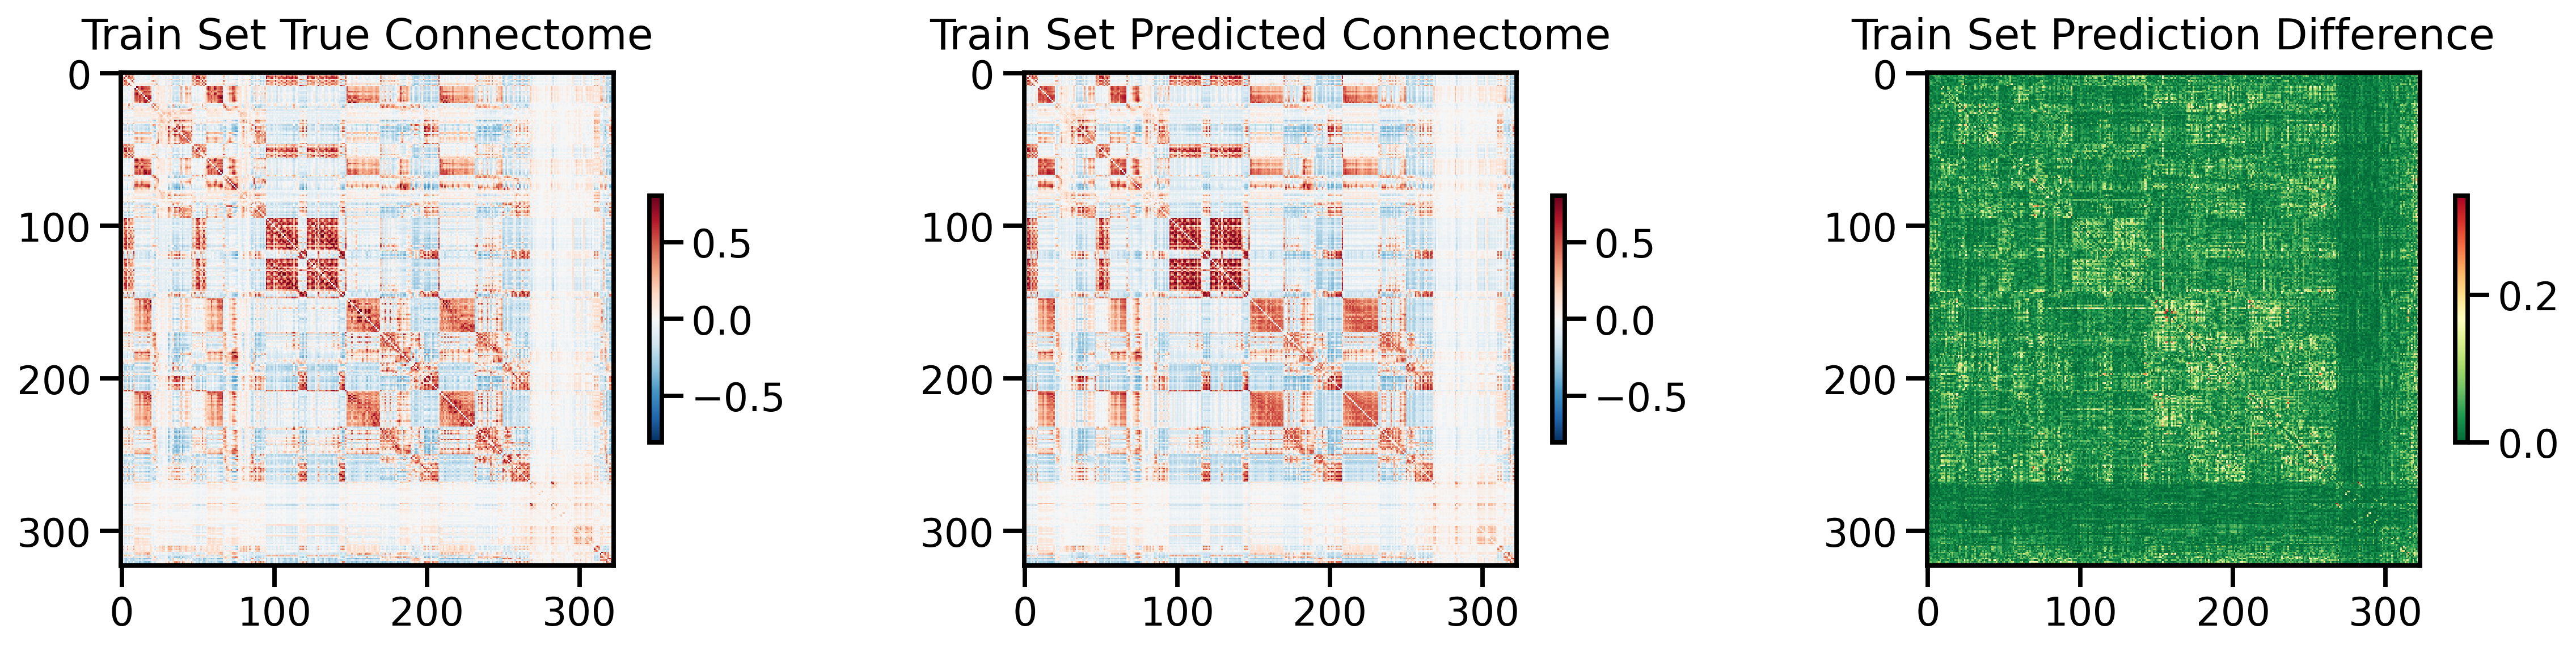

<Figure size 640x480 with 0 Axes>

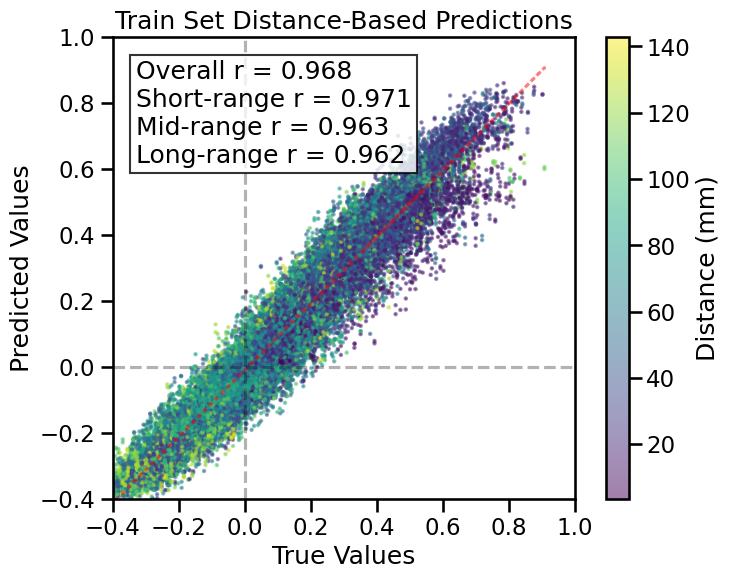

Running test evaluation...

=== TEST EVALUATION ===
Evaluating 132 regions, 17292 connections


<Figure size 640x480 with 0 Axes>

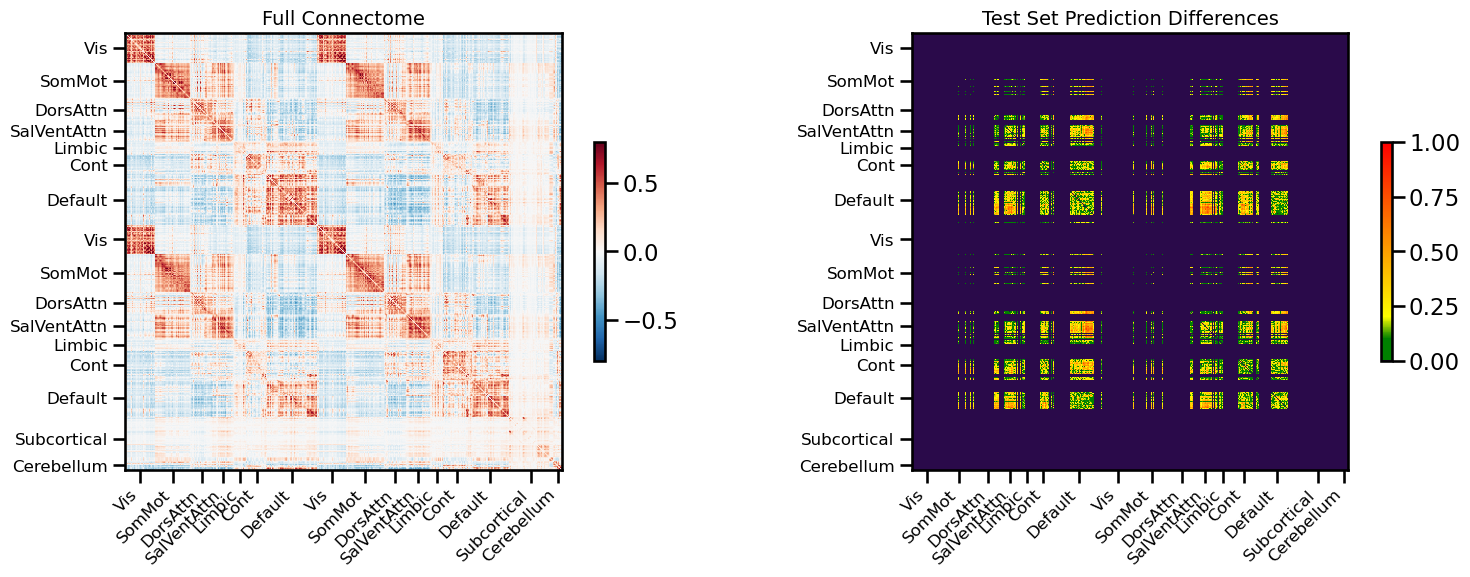

<Figure size 640x480 with 0 Axes>

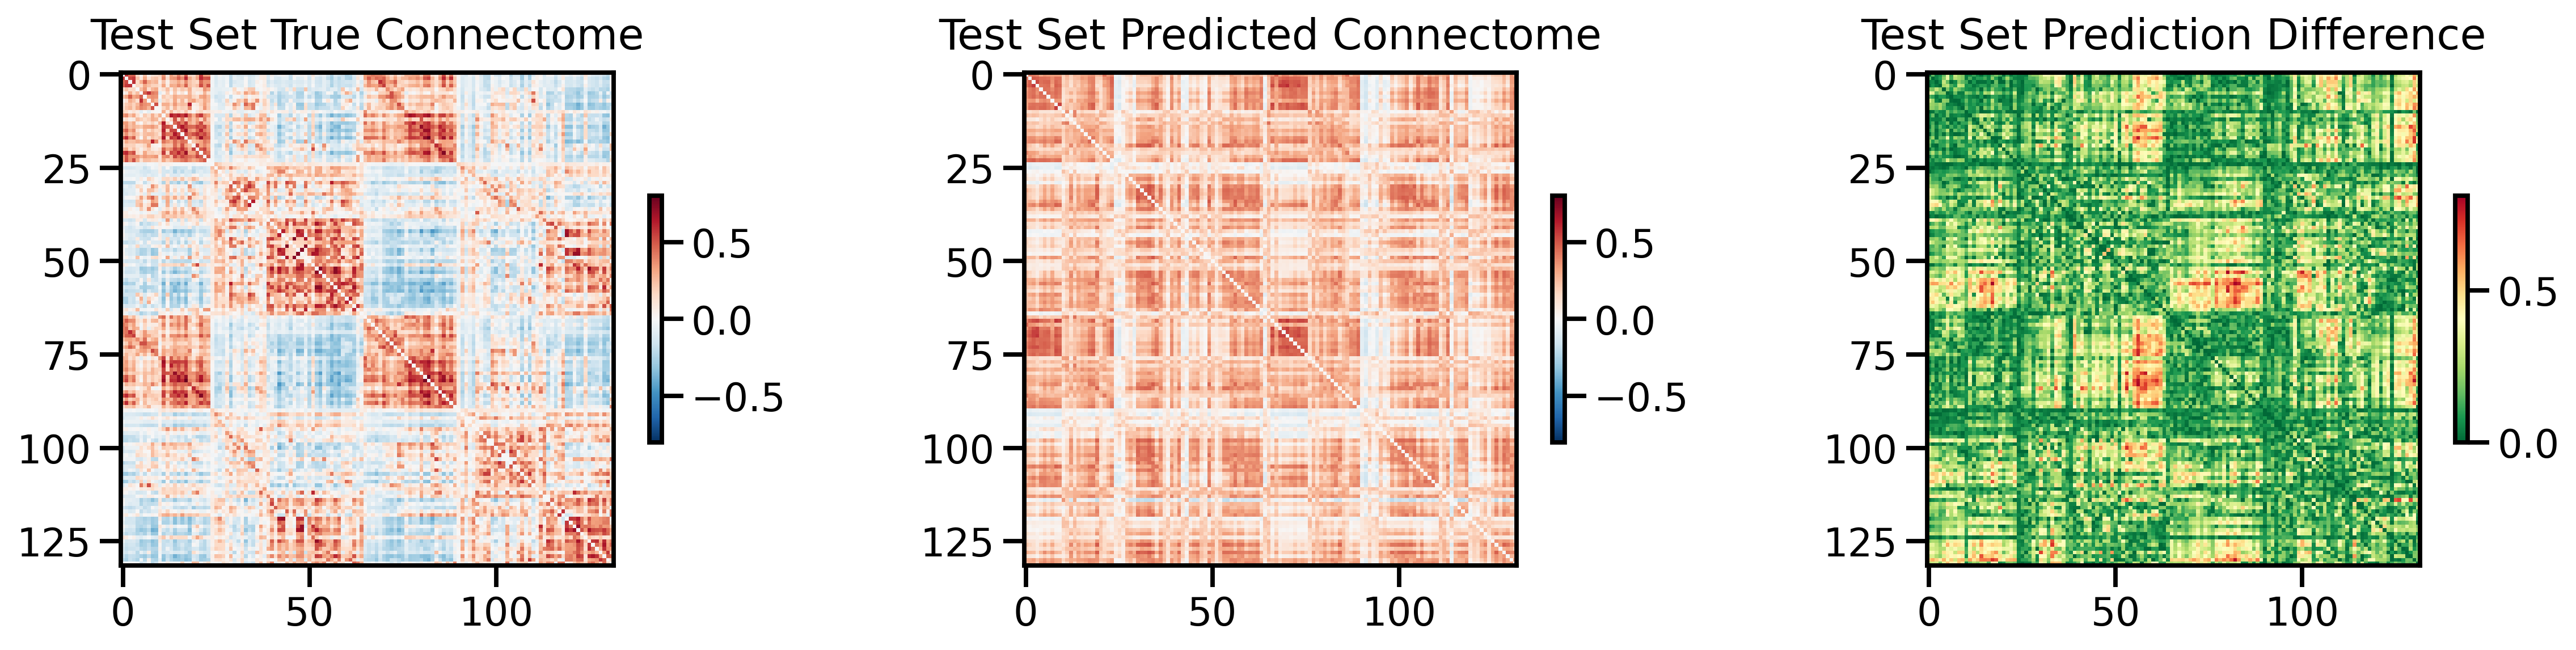

<Figure size 640x480 with 0 Axes>

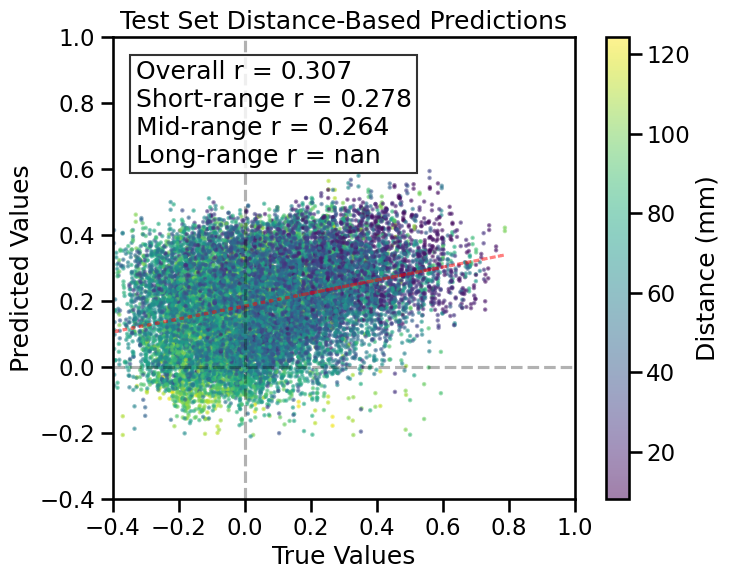

TRAIN METRICS
GLOBAL: mse=0.002404, mae=0.035580, r2=0.9298, pearson_r=0.9682, spearman_r=0.9569, geodesic_distance=16.4071
DISTANCE-BASED: short=0.9711, mid=0.9626, long=0.9624
HEMISPHERIC: left=0.9653, right=0.9713, inter=0.9701
CONNECTION STRENGTH: neg=0.5132, weak=0.9415, pos=0.7852
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  ------------------------------
  Cont          0.9472    0.9620
  Default       0.9595    0.9647
  SalVentAttn    0.9555    0.9681
  Limbic        0.9814    0.9752
  DorsAttn      0.9639    0.9625
  SomMot        0.9684    0.9653
  Vis           0.9628    0.9681
  Subcortical    0.9659    0.9633
  Cerebellum    0.9482    0.9615

TEST METRICS
GLOBAL: mse=0.066196, mae=0.206838, r2=-0.4151, pearson_r=0.3073, spearman_r=0.2968, geodesic_distance=12.7299
DISTANCE-BASED: short=0.2776, mid=0.2639
HEMISPHERIC: left=0.3197, right=0.3396, inter=0.2796
CONNECTION STRENGTH: neg=-0.0410, weak=0.2157, pos=0.0844
NETWORK CORRELATIONS:
  NETWORK      INTRA      I

  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.
CPU Usage: 25.3%
RAM Usage: 8.4%
Available RAM: 1.4T
Total RAM: 1.5T
| ID | GPU | MEM |
------------------
|  0 |  0% |  9% |
Sim complete
Simulation completed in 706.95 seconds (11.78 minutes)


8709

<Figure size 640x480 with 0 Axes>

In [18]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='UKBB',
              parcellation='S456',
              hemisphere='both',
              connectome_target='FC',
              binarize=False,
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='lobe',
              random_seed=42,
              search_method=('wandb', 'mse', 4),
              track_wandb=True,
              skip_cv=True,
              model_type='shared_transformer_cls',
              use_gpu=True, 
              null_model='none',
              use_folds=[3]
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()